<a href="https://colab.research.google.com/github/Jun-629/20MA573/blob/master/src/Hw8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__For ($\star$ 2)__
- Consider CFD soln $u^h$ for $h = \frac{1}{4}$.
- Plot a figure with
\begin{cases}
x \to u^h(x) \\
x \to u(x) \\
\end{cases}
- for $h = 2^{-2} ... 2^{-6}$, compute $\epsilon^h = \sup_{0 \le i \le N}|u(x_i) - u_i^h|$

In [2]:
import numpy as np
import scipy.linalg as sl

r = 18
s = 34
t = 14

f = [x*x/8 - 3 for x in range(1,4)]

Lh = np.array([[1, 0, 0 ,0, 0], [-r, s, -t, 0, 0],[0, -r, s, -t, 0], [0, 0, -r, s, -t], [0, 0 ,0, 0, 1]])
Rf = np.array([0, f[0], f[1], f[2], 0])
uh = sl.solve(Lh, Rf)
print(uh)

[ 1.48029737e-16 -1.87500000e-01 -2.50000000e-01 -1.87500000e-01
  0.00000000e+00]


- Thus CFD soln $u^h$ is $[0, -0.1875, -0.25, -0.1875, 0]$.

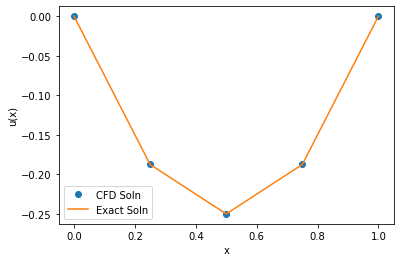

In [3]:
import matplotlib.pyplot as plt

Gh = np.linspace(0, 1, 5)
u = []

for i in Gh:
  u.append(i*i - i)

plt.plot(Gh, uh, 'o', label='CFD Soln')
plt.plot(Gh, u, label ='Exact Soln')

plt.ylabel('u(x)')
plt.xlabel('x')
plt.legend();

In [4]:
max_eps = []
for i in range(2,7):
  h = 2**(-i)
  r = 1/h/h + 1/2/h
  s = 2/h/h + 2
  t = 1/h/h - 1/2/h
  m = np.zeros((2**i+1,2**i+1))     # matrix, i.e. Lh
  m[0,0] = 1
  m[2**i,2**i] = 1
  for j in range(1,2**i):
    m[j,j-1] = -r
    m[j,j] = s
    m[j,j+1] = -t
  #print(m)                          # the ultimate Lh we need
  f = [0]                            # Rf with f0 = 0
  for k in range(1,2**i):
    f.append(2*(k*h)**2-3)
  f.append(0)                        # the ultimate Rf we need
  uh = sl.solve(m, f)
  #print(uh)
  G_h = np.linspace(0,1,2**i+1)
  u_l = []
  for p in G_h:
    u_l.append(p*p-p)
  eps = []                           # to find supremum epi^h
  for q in range(len(u_l)):
    eps.append(u_l[q] - uh[q])
  max_eps.append(max(eps))
  print(">>> When h = 2^(-", i ,"), epsilon^h = ", max(eps))

>>> When h = 2^(- 2 ), epsilon^h =  0.0
>>> When h = 2^(- 3 ), epsilon^h =  2.873518416676876e-16
>>> When h = 2^(- 4 ), epsilon^h =  0.0
>>> When h = 2^(- 5 ), epsilon^h =  0.0
>>> When h = 2^(- 6 ), epsilon^h =  2.7755575615628914e-17


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


>>>>The convergence order is nan


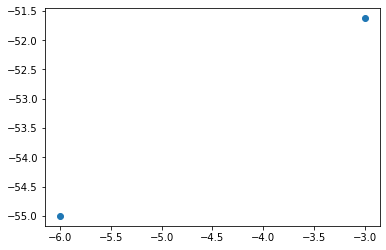

In [6]:
x = [-2, -3, -4, -5, -6]
y = np.log2(max_eps)
plt.plot(x,y,'o')

import scipy.stats as stats
order = stats.linregress(x, y)
print('>>>>The convergence order is ' "%.1f" % -round(order[0]))

- Guess: This is because most of $\epsilon^h = \sup$ equals to 0, which shows that this is a good apprxiamtion by using CFD.